# 4. Working with larger data sets

This workbook uses a large sample dataset in order to more realistically simulate the set up of the analysis process from start to finish. The dataset is not included directly with this code but can be downloaded from Zenodo - https://zenodo.org/record/3630511#.XjHhJGj7SUl

We assume that you have downloaded the data, unpacked it and placed it in the *example_data* folder before running this notebook.

The sample is a Titanium-64 Alloy (https://en.wikipedia.org/wiki/Ti-6Al-4V). The energy of the imaging beam was 89 KeV meaning a wavelenth of ~0.14 Å.

The experiment begins at room temperature, heats for approximately 2000 seconds, is held constant for about 1000 seconds, undergoes a high temperature deformation at around 3400 seconds from the start of the experiment and is then cooled. We expect primarily heaxagonal crystal structure ($\alpha$-phase) at room temperature, BCC crystal structure ($\beta$-phase) and high temperature and some small structural change as a result of the deformation.

Although we could follow the evolution of the cubic and hexagonal crystals in the material by fitting only a single peak for each, we want to consider as many of the possible orientations as possible to get better statistics.

We follow the beta structure by fitting peaks corresponding to the BCC Cubic Miller indices: 110, 200, 211, 220 and 310.

We follow the alpha structure by fitting hexagonal indices: 10-10, 0002, 10-11, 10-12, 11-20, 10-13, 11-22, 20-21 and 0004.


## 4.1. Calculating peak angles

Bragg's law gives the angle of scattering from a crystal lattice ($\theta$) as a function of the radiation wavelength planes ($\lambda$):

$$ \lambda = 2d \sin (\theta) $$

We have incoming radiation ($\theta$) of wavelength 0.14 Å. The Ti lattice constants are $a$ = 2.95 Å, $c$ = 4.68 Å.

### 4.1.1. Cubic crystal symmetry

For a cubic system the relation beween lattice spacing and the lattice constant ($a$) is:

$$ \frac{1}{d^2} = \frac{h^2 + k^2 + l^2}{a^2}  $$

Combining this relation with Bragg's law gives the relation between the scattering angle, radiation wavelength and lattice constant:

$$ \sin^2(\theta) = \frac{\lambda^2}{4a^2}(h^2 + k^2 + l^2) $$

For BCC the symmetry causes systematic absences in odd numbered hkl planes so we expect to see the 110, 200, 211, 220 and 310 peaks.

The approximate 2 theta scattering angles are then:

* 110: 3.85°
* 200: 5.44°
* 211: 6.66°
* 220: 7.70°
* 310: 8.60°

### 4.1.2. Hexagonal crystal symmetry

Using the Bravais-Miller system of notation for the hexagonal crystal symmetry (h, k, i, l) the relation between the lattice spacings and the lattice constants is:

$$ d = \frac{a}{\sqrt{\frac{4}{3}(h^2 + k^2 + hk) + \frac{a^2}{c^2}l^2)}} $$

Combining this with Bragg's law gives the relation between the scattering angle, radiation wavelength and lattice constants:

$$ \theta = \sin^{-1} \left( \frac{\lambda \sqrt{\frac{4}{3}(h^2 + k^2 + hk) + \frac{a^2}{c^2}l^2)}}{2a} \right) $$

Iterating through the combinations of indices gives us two theta angles of:

* 10-10: 3.14°
* 0002: 3.43°
* 10-11: 3.58°
* 10-12: 4.65°
* 11-20: 5.44°
* 10-13: 6.03°
* 20-20: 6.28°
* 11-22: 6.43°
* 20-21: 6.51°
* 0004: 6.86°
* 20-22: 7.16°


## 4.2 Finding the peaks

Lets take a look the diffraction pattern and see how it looks.

Diffraction pattern successfully loaded from file.


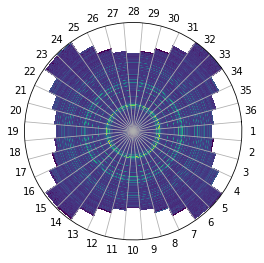

In [1]:
%matplotlib inline

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum, FittingExperiment

spectral_data = FitSpectrum('../example_data/example_data_large/adc_065_TI64_NDload_900C_15mms_00001.dat', 90)
spectral_data.plot_polar()

Now plot a single specturm

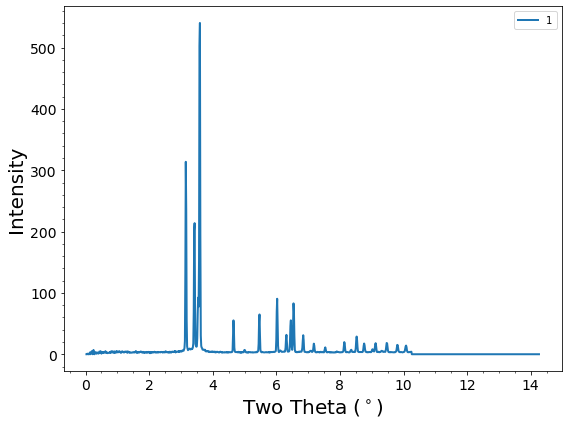

In [2]:
spectral_data.plot(1)

Zoom in a bit.

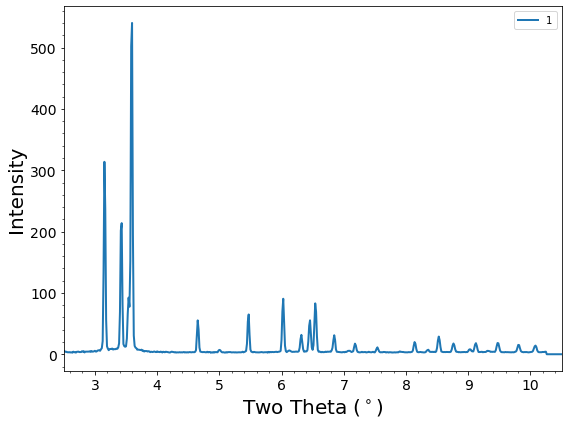

In [3]:
spectral_data.plot(1, x_range=(2.5, 10.5))

This looks reasonable. Since this is the first spectrum at the start of the experiment we expect high intensity hexagonal peaks and weak beta peaks. Using our calcualtions from above we can zoom in a section at a time and assign the peaks.

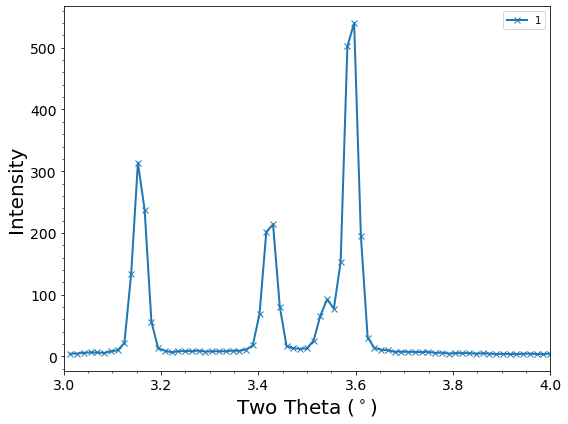

In [4]:
spectral_data.plot(1, x_range=(3, 4), show_points=True)

These peaks fit with being 10-10, 0002, a weak 110 and 10-11. We should fit 0002, 110 and 10-11 as a triplet due to their proximity.

The 110 is a little way off our calculated value - about 8% lower than expected. This is due to alloying - inclusion of Vanadium in the beta phase. This is a constant percentage offset so we modify out original estimates of the peak positions to:

* 110: 3.55°
* 200: 5.01°
* 211: 6.13°
* 220: 7.08°
* 310: 7.92°

We can quickly plot the peak params to check they are OK, then do the fits and check the fit results.

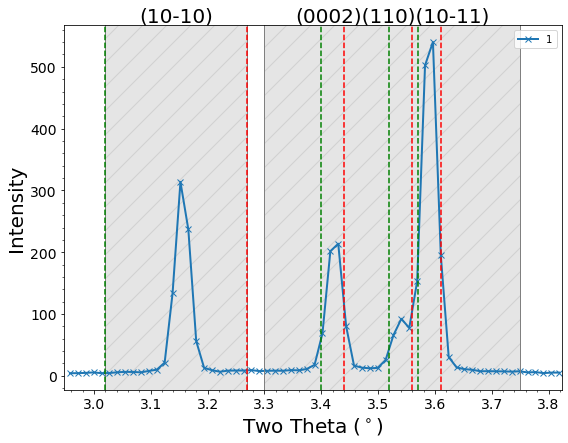

Fitting complete.


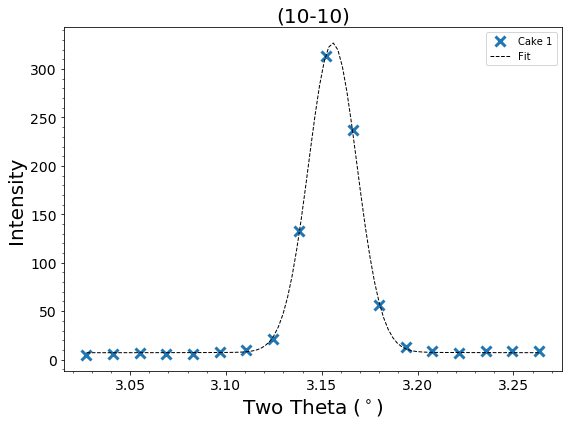

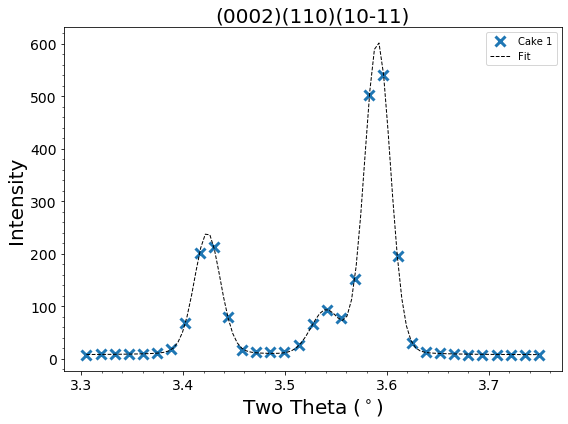

In [5]:
peak_params = [PeakParams('(10-10)', (3.02, 3.27)),
               PeakParams('(0002)(110)(10-11)',  (3.3, 3.75), [(3.4, 3.44), (3.52, 3.56), (3.57, 3.61)])]

spectral_data.plot_peak_params(peak_params, 1, show_points=True)

spectral_data.fit_peaks(peak_params, 1)
spectral_data.plot_fit('(10-10)')
spectral_data.plot_fit('(0002)(110)(10-11)')

That looks reasonable. Now on to the next section of the spectrum.

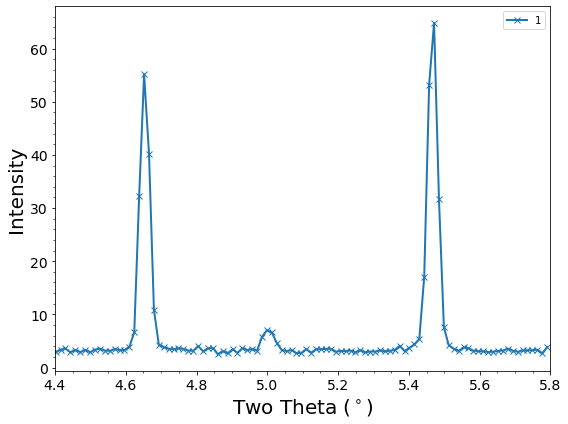

In [6]:
spectral_data.plot(1, x_range=(4.4, 5.8), show_points=True)

These look good for 10-12, 200 and 11-20. Again lets quickly plot the fits to check they are OK.

Fitting complete.


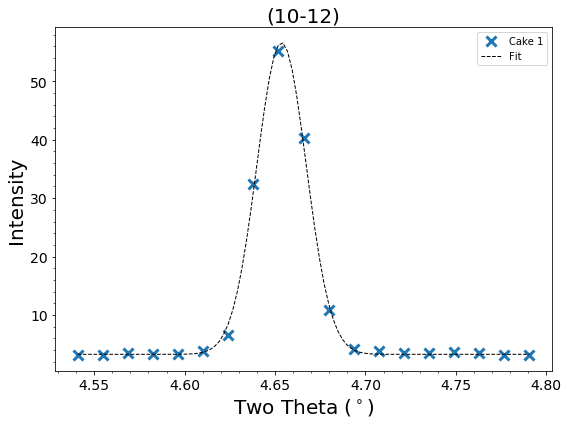

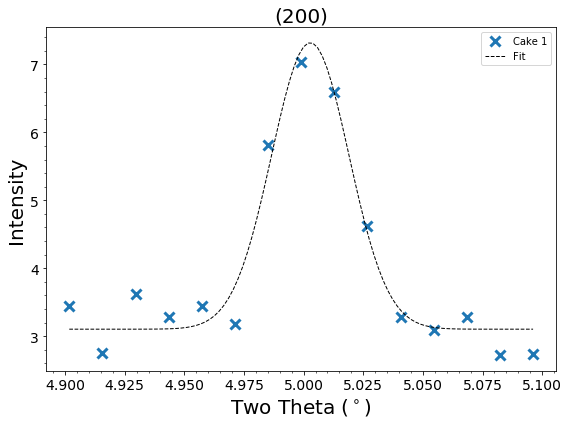

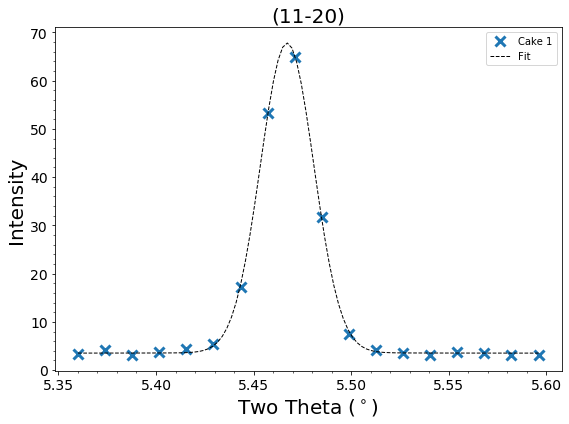

In [7]:
peak_params = [PeakParams('(10-12)', (4.54, 4.8)),
               PeakParams('(200)', (4.9, 5.10)),
               PeakParams('(11-20)', (5.35, 5.6))]

spectral_data.fit_peaks(peak_params, 1)
for fit in spectral_data.fitted_peaks:
    fit.plot()

Now moving up to the next section of the spectrum

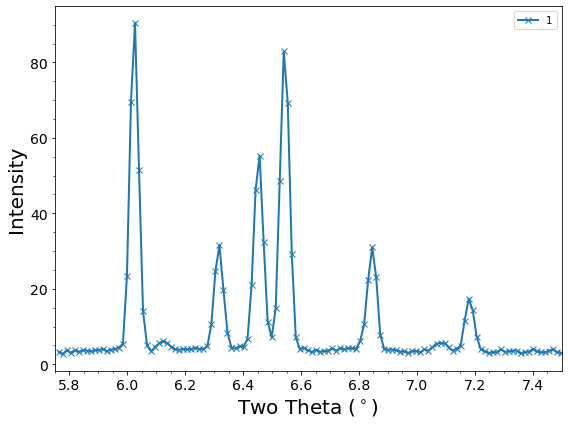

In [8]:
spectral_data.plot(1, x_range=(5.75, 7.5), show_points=True)

The first peak is the hexagonal 10-13. Going with our revised esimates for the cubic structures the small peak at 6.1° must be the 211. The next four strong peaks then correspond to 20-20, 11-22, 20-21 and 0004 in ascending order. There is a weak peak for the cubic 220 and then the next peak is likely 20-22. We have probably got enough hexagonal peaks at this point but even though we dont need it, we still need to include the 20-22 peak. The 220 and 20-22 peaks are so close that we wont be able to reliably fit it as a singlet.

With the proximity of these peaks, they would be probably be good to fit as a doublet, singlet, doublet and singlet and then doublet.

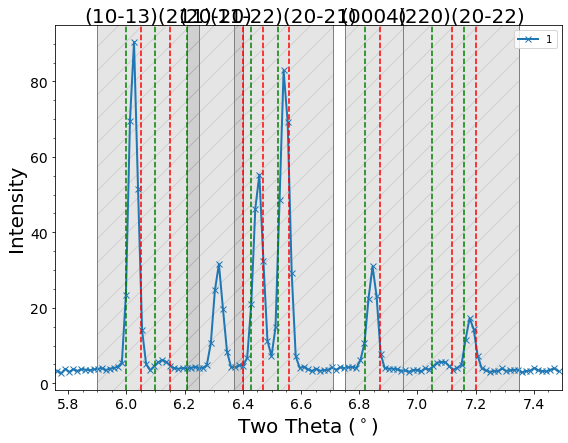

Fitting complete.


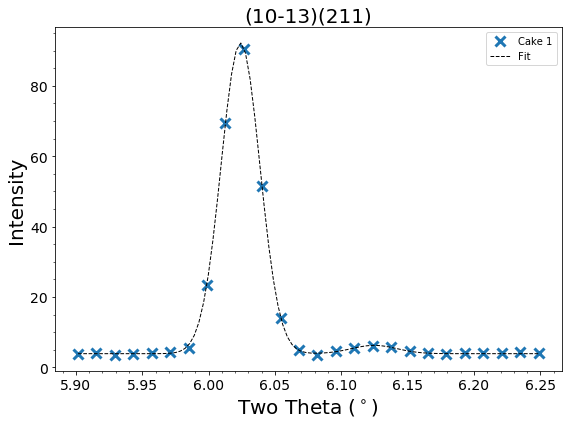

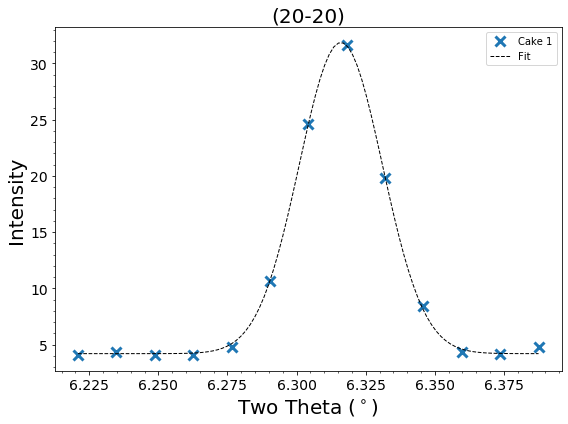

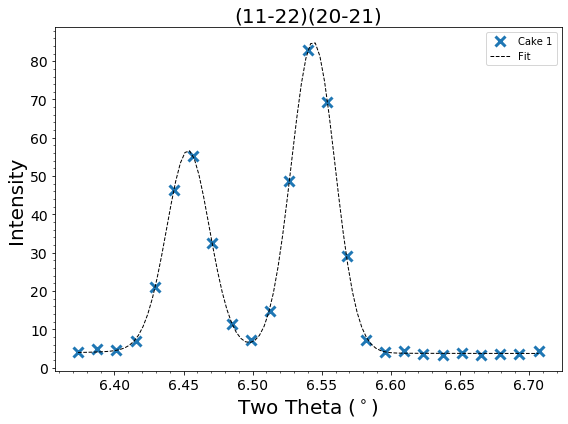

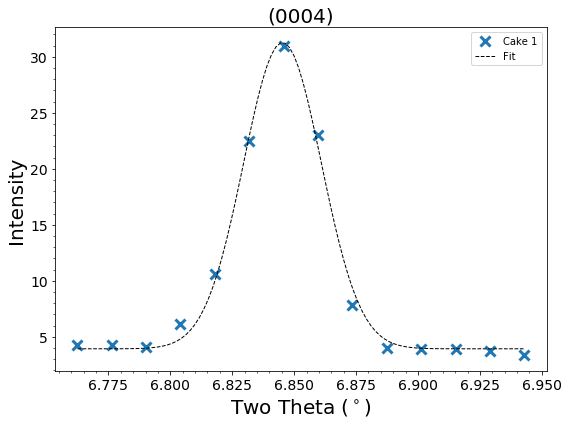

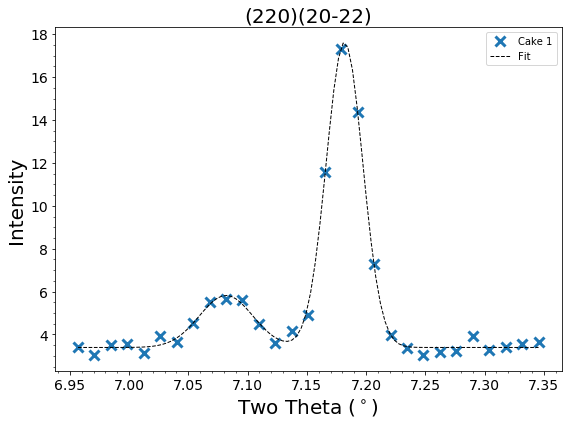

In [9]:
peak_params = [PeakParams('(10-13)(211)', (5.9, 6.25), [(6.00, 6.05), (6.10, 6.15)]),
               PeakParams('(20-20)', (6.21, 6.4)),
               PeakParams('(11-22)(20-21)',  (6.37, 6.71), [(6.43, 6.47), (6.52, 6.56)]),
               PeakParams('(0004)',  (6.75, 6.95), [(6.82, 6.87)]),
               PeakParams('(220)(20-22)', (6.95, 7.35), [(7.05, 7.12), (7.16, 7.20)])]

spectral_data.plot_peak_params(peak_params, 1, show_points=True)

spectral_data.fit_peaks(peak_params, 1)
for fit in spectral_data.fitted_peaks:
    fit.plot()

It would be good to try and get another peak for the cubic phase - we should see if we can find the 310 peak.

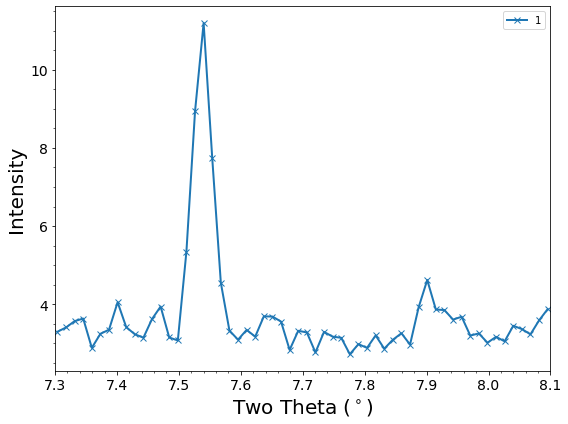

In [10]:
spectral_data.plot(1, x_range=(7.3, 8.1), show_points=True)

The first peak is probably 10-14, we will ignore this as we have enough hexagonal peaks and just try to get the very small 310 peak.

Fitting complete.


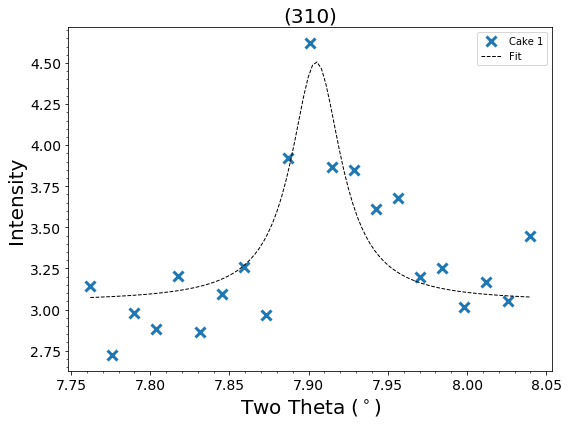

In [11]:
peak_params = [PeakParams('(310)', (7.75, 8.05))]

spectral_data.fit_peaks(peak_params, 1)
for fit in spectral_data.fitted_peaks:
    fit.plot()

It's not a great fit because the peak is so small but when it grows later in the experiment the fit should be better.

Lets put all these peak params together and do a time fit.

## 4.3 Time fitting

### 4.3.1. Inital fit attempt

Lets start by fitting these peaks in every 100th frame to check nothing is odd before diving in and fitting the full data set.

In this case I choose to reuse the fits. Reusing the fits can cause problems if there is a significant difference between frames but can be faster if the fits are similar from frame to frame. It is best to try with and without and see which is quicker!

In this case reusing the fits is quicker becuase some of the triplet fits have close peaks with very different magnitudes so it is hard for the algorithm to guess good inital parameters to get the inflection point between them.

In [12]:
frame_time = 1
file_string = '../example_data/example_data_large/adc_065_TI64_NDload_900C_15mms_{:05d}.dat'
first_cake_angle = 90
cakes_to_fit = 1
peak_params = [PeakParams('(10-10)', (3.02, 3.27)),
               PeakParams('(0002)(110)(10-11)',  (3.3, 3.75), [(3.4, 3.44), (3.52, 3.56), (3.57, 3.61)]),
               PeakParams('(10-12)', (4.54, 4.8)),
               PeakParams('(200)', (4.9, 5.10)),
               PeakParams('(11-20)', (5.35, 5.6)),
               PeakParams('(10-13)(211)', (5.9, 6.25), [(6.00, 6.05), (6.10, 6.15)]),
               PeakParams('(20-20)', (6.21, 6.4)),
               PeakParams('(11-22)(20-21)',  (6.37, 6.71), [(6.43, 6.47), (6.52, 6.56)]),
               PeakParams('(0004)',  (6.75, 6.95), [(6.82, 6.87)]),
               PeakParams('(220)(20-22)', (6.95, 7.35), [(7.05, 7.12), (7.16, 7.20)]),
               PeakParams('(310)', (7.75, 8.05))
              ]
max_frame = 5657
merge_cakes = False
frames_to_fit = range(1, max_frame, 100)
experiment = FittingExperiment(frame_time, file_string,first_cake_angle, cakes_to_fit, peak_params, merge_cakes, frames_to_fit)

experiment.run_analysis(reuse_fits=True)

Processing 57 diffraction patterns.





The following fits took over 500 fitting iterations. The quality of these fits should be checked.
Fit for peak (0002)(110)(10-11) at timesteps: [42]
Fit for peak (10-13)(211) at timesteps: [8, 24, 25, 31, 34, 36, 38, 40, 44, 45, 47, 49, 51, 52]
Fit for peak (20-20) at timesteps: [33, 36]
Fit for peak (11-22)(20-21) at timesteps: [48]
Fit for peak (220)(20-22) at timesteps: [7, 9, 23, 33, 34, 38, 54]


Analysis complete.


You may have noticed that the progress bar does not fill linearly. For some timesteps the fitting stalls a little. This is because the fits are better at some points than others, sometimes many iterations of the fitting minimiser are required to get a good fit. This isn't necessarily a problem but excessive stalling can be indicitive of poor initial parameters.

After the fitting algorithm completes, if there are any peak fits which required more than 500 minimisation steps, they are highlighted in a report. These points should be checked in particular to see if there was a problem with the fitting. If you find that this report flags too many false positives you can increase the number of minimisation steps that triggers the report by providing the `evaluation_threshold` parameter to the `run_analysis` function.

In this case there are 5 peaks which the fitting has had trouble with at some point in the fitting process. The (0002)(110)(10-11), (20-20) and (11-22)(20-21) peaks only have 1 or two of rough spots each so they are probably nothing to worry about. However, the (10-13)(211) and (220)(20-22) peaks have multiple poor fits - these are probably worth checking.

### 4.3.2 Refining the "(10-13)(211)" peak

Lets do the (10-13)(211) peak first. The troublesome fits seem to be mostly timesteps 30 and 50. First we can look at the fit parameters to see if there is anything unusual.

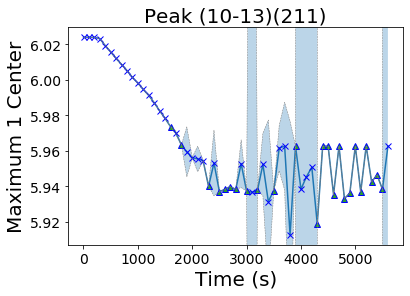

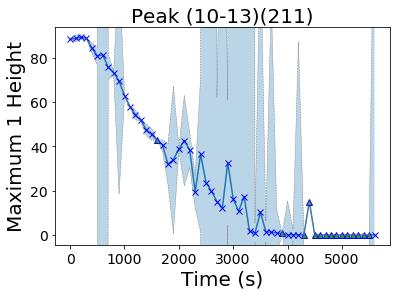

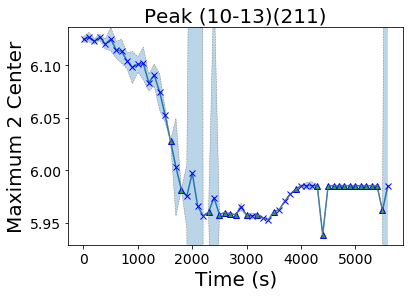

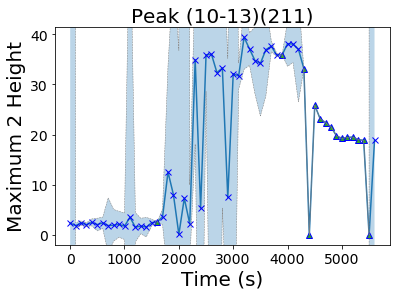

In [13]:
experiment.plot_fit_parameter("(10-13)(211)", "maximum_1_center", show_points=True)
experiment.plot_fit_parameter("(10-13)(211)", "maximum_1_height", show_points=True)
experiment.plot_fit_parameter("(10-13)(211)", "maximum_2_center", show_points=True)
experiment.plot_fit_parameter("(10-13)(211)", "maximum_2_height", show_points=True)

There is definately something wrong here. The error bars are all over the place and the parameters dont change smoothly over time. 

If there is no error estimate availiable for a parameter, the data point on the graph is shown as a triangle. The lack of an error estimate may indicate a problem with the fit but not necessarily. The error estimate is made by inverting the curvature matrix of the fit. This will not work if changing the parameter does not significantly affect the fitting result or if changing the parameter results in an evalutation error.

In this case the fits for both maxima look poor so there is probably something obviously wrong with the fits.

In [18]:
experiment.plot_fits(peak_names=["(10-13)(211)"], num_timesteps=20)

KeyError: "Fit: '(10-13)(211)' not found"

We can see that although the 211 peak is present at the begining of the experiment it disappears entirely on heating and doesnt reappear later in the exepriment. The doublet fit is still trying to fit a peak however and this is likely confusing the fit.

In this case it is probably better to ignore the 211 peak entirely as we cant get much information out of it. The 10-13 peak should be fine to fit on its own.

### 4.3.3 Refining the "(220)(20-22)" peak

The problems for this peak seem to be fairly widely spread across the experiment. Lets plot the parameters first:

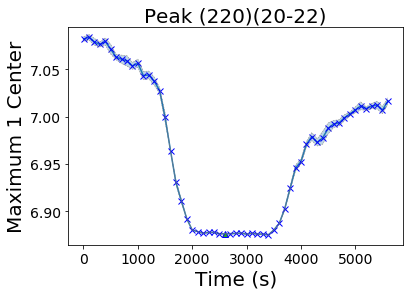

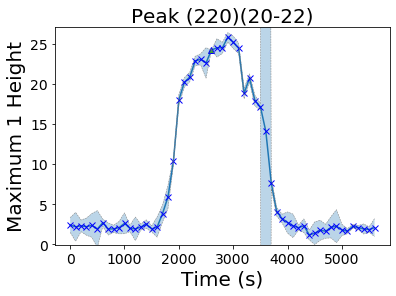

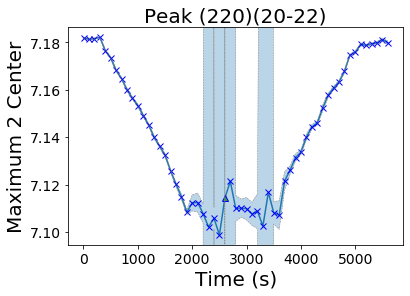

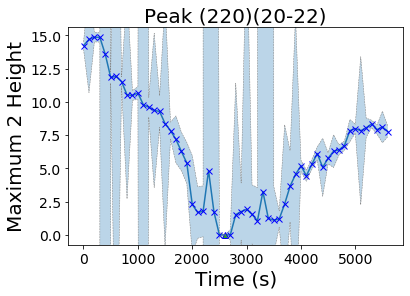

In [15]:
experiment.plot_fit_parameter("(220)(20-22)", "maximum_1_center", show_points=True)
experiment.plot_fit_parameter("(220)(20-22)", "maximum_1_height", show_points=True)
experiment.plot_fit_parameter("(220)(20-22)", "maximum_2_center", show_points=True)
experiment.plot_fit_parameter("(220)(20-22)", "maximum_2_height", show_points=True)

The 220 peak looks fine but it is the 20-22 that is struggling. Lets plot the fits to see why.

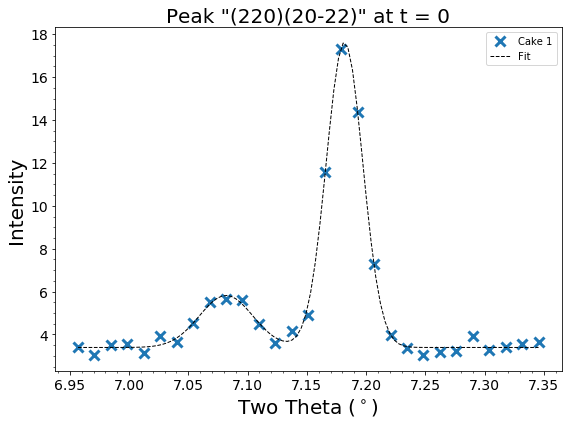

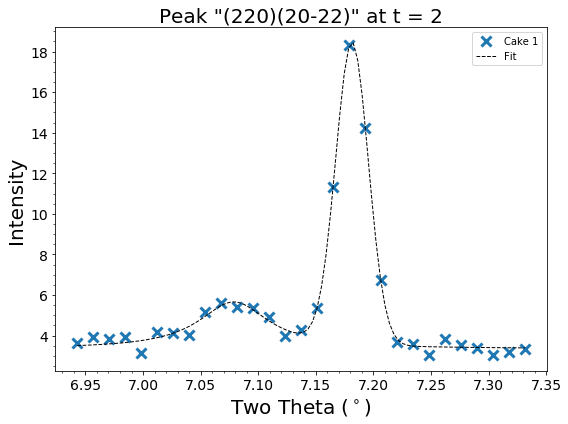

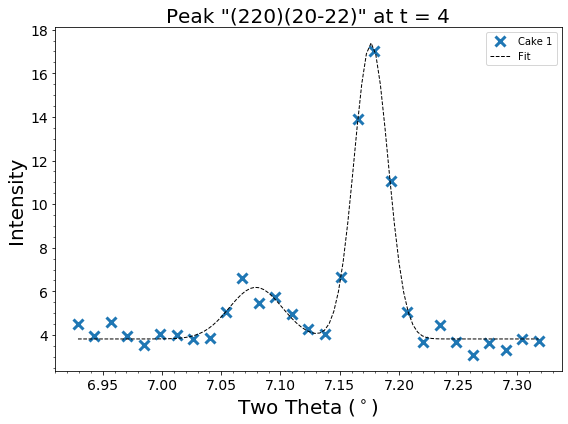

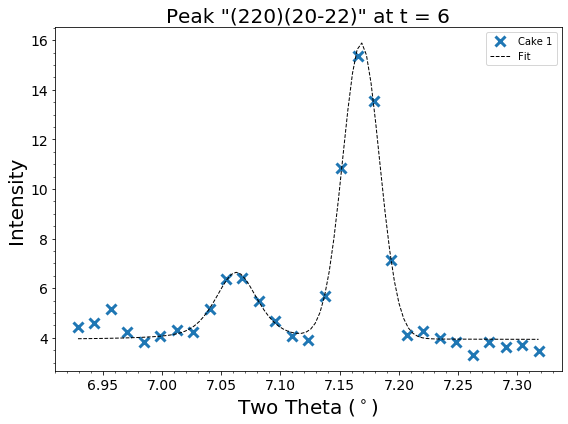

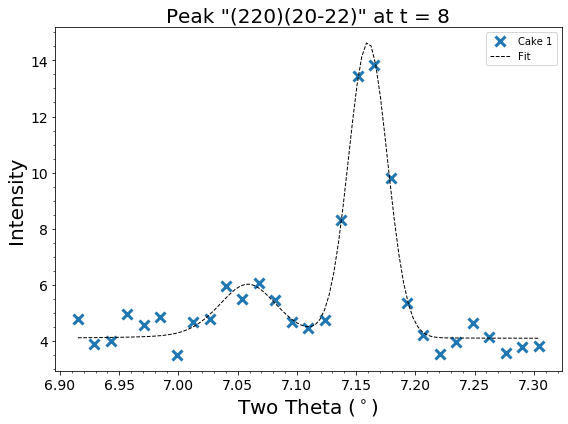

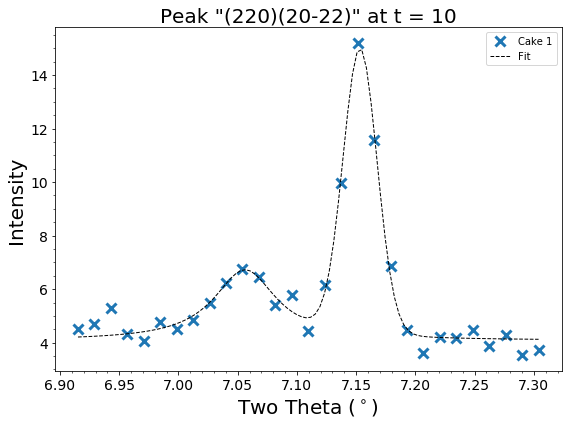

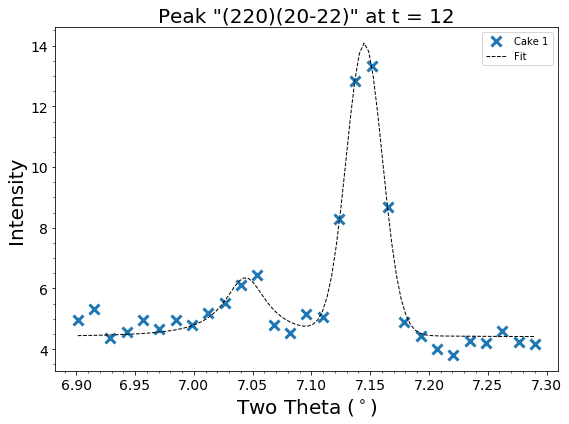

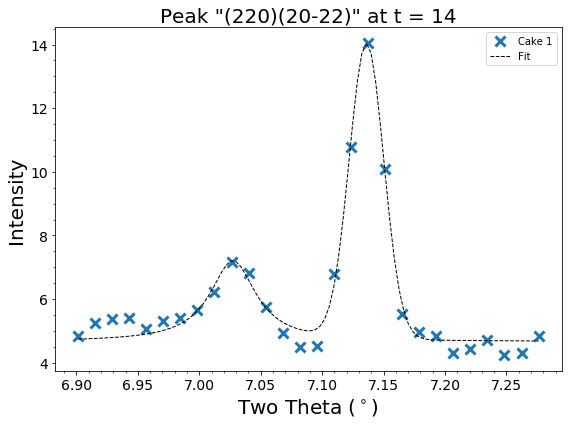

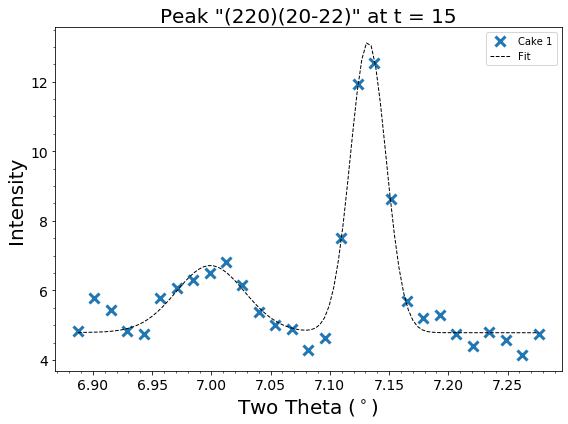

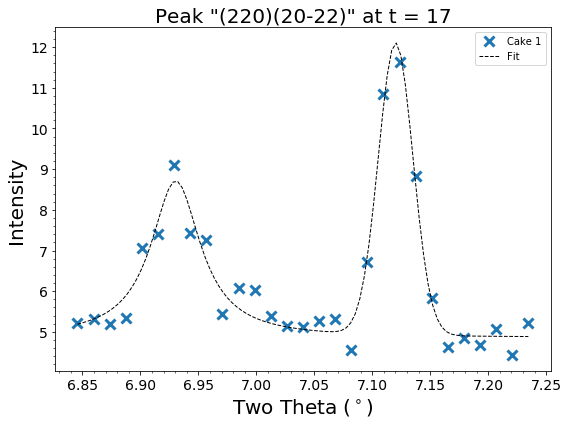

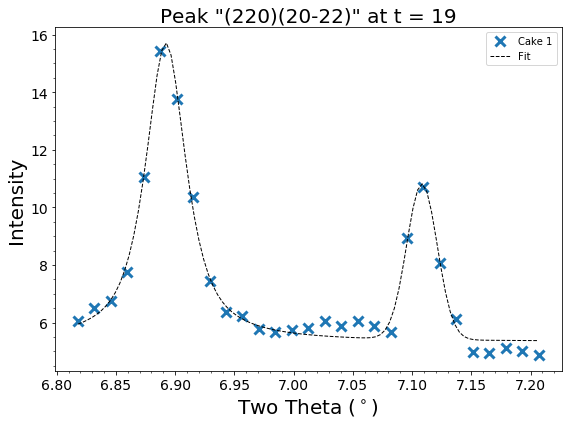

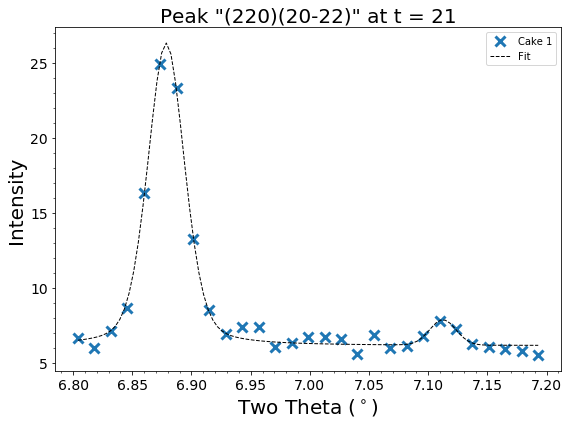

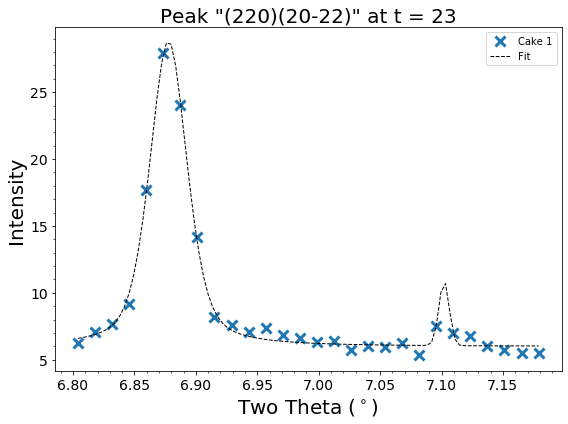

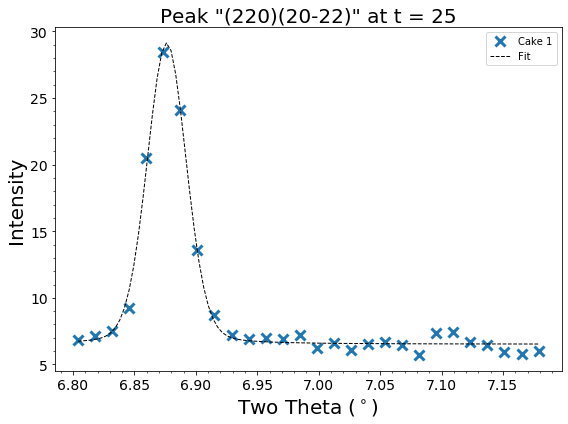

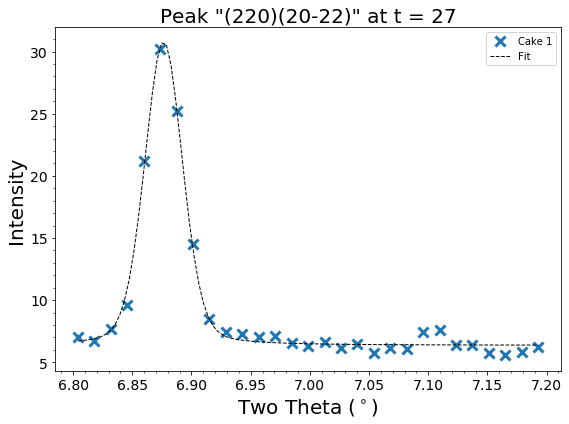

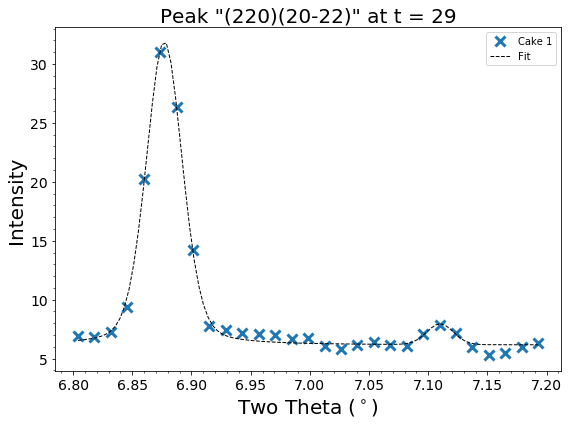

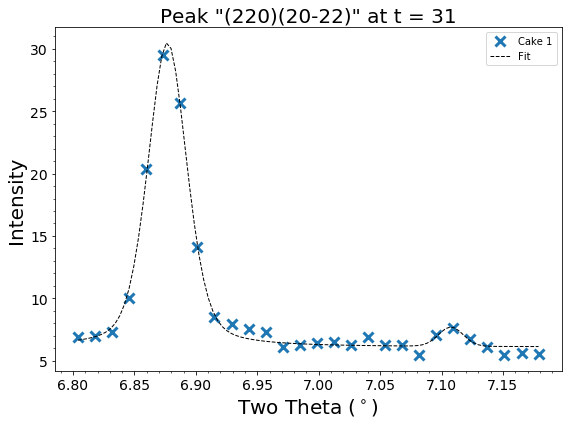

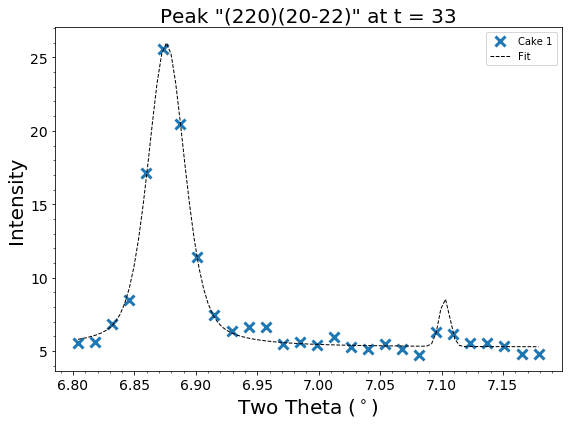

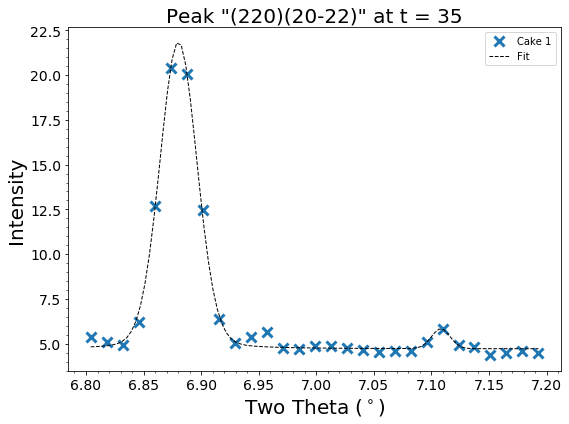

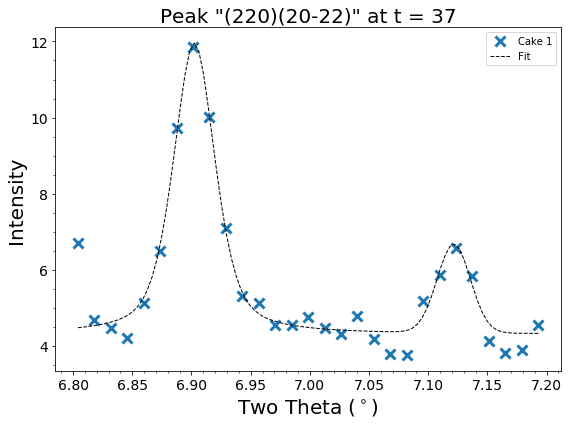

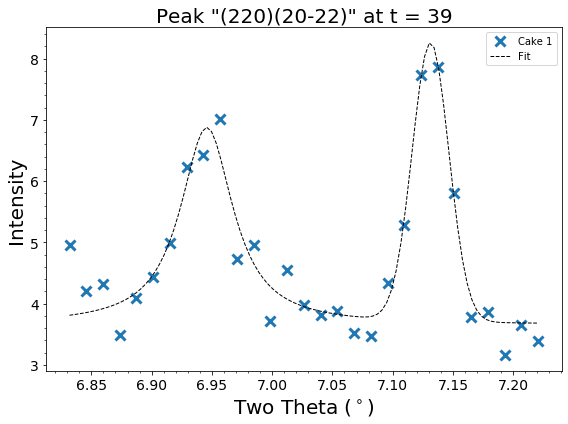

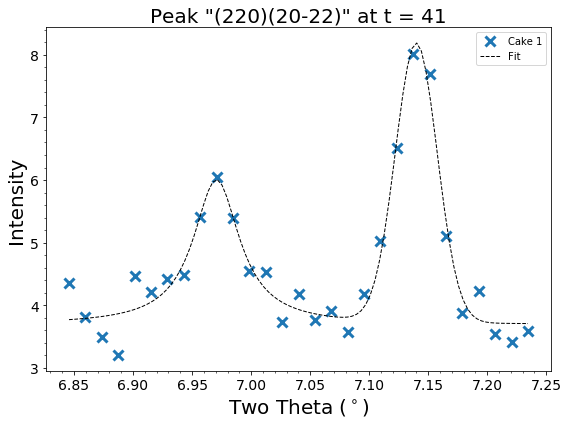

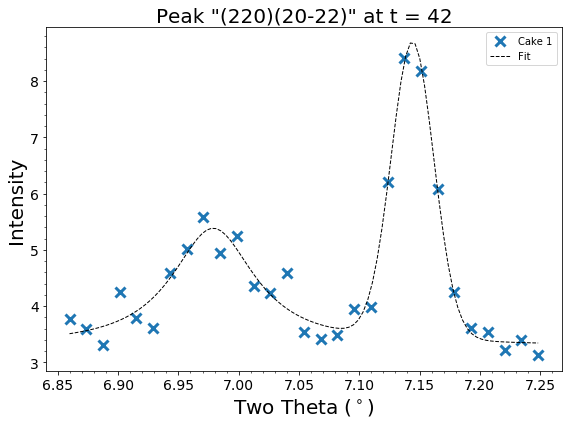

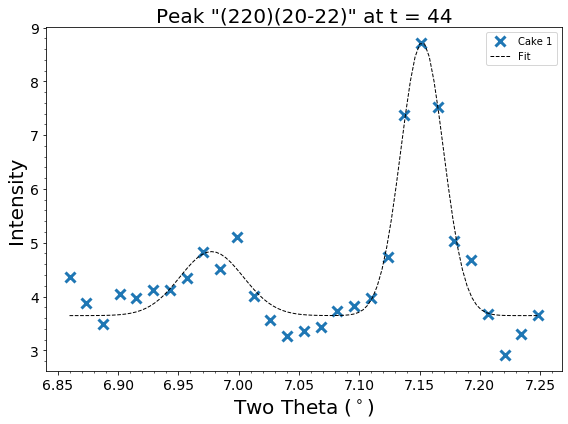

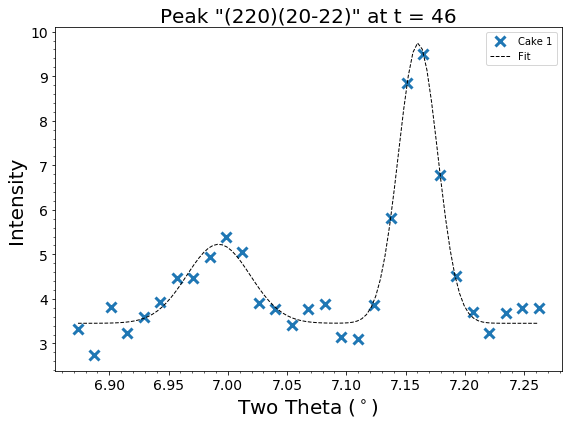

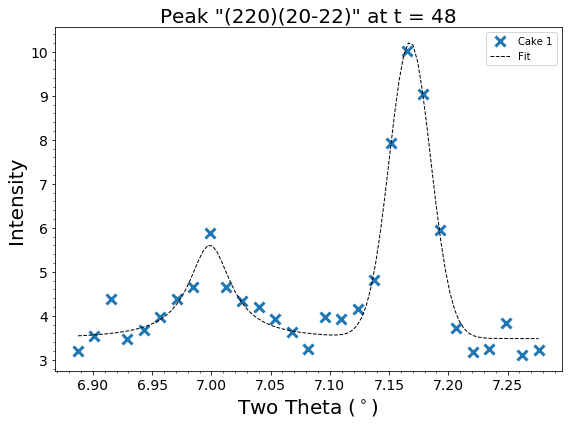

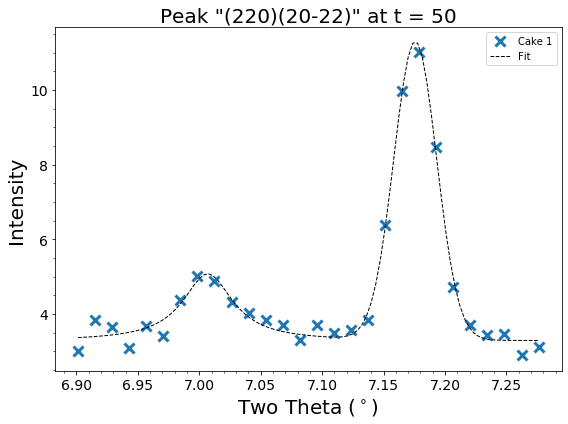

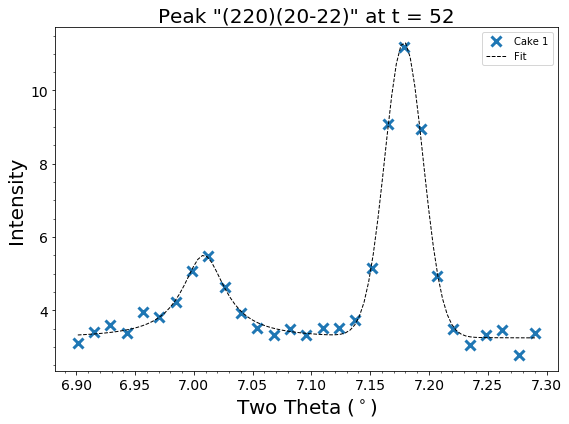

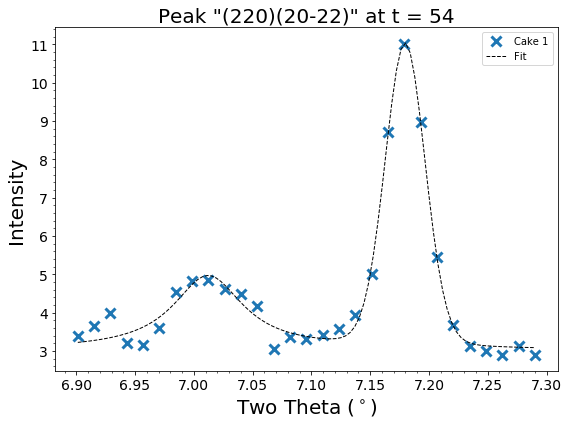

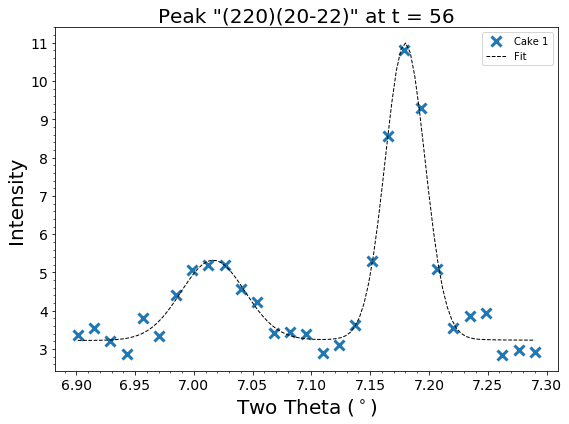

In [16]:
experiment.plot_fits(peak_names=["(220)(20-22)"], num_timesteps = 30)

The fits look fine here, the main problem we have is the low peak height. Anywhere where the peak height is not far above the noise the fitting will struggle a little. This is to be expected and just treat the peaks with low height with care.

### 4.3.4. Implementing the refinements

Lets remove the 211 peak and try the fit again.

In [17]:
peak_params = [PeakParams('(10-10)', (3.02, 3.27)),
               PeakParams('(0002)(110)(10-11)',  (3.3, 3.75), [(3.4, 3.44), (3.52, 3.56), (3.57, 3.61)]),
               PeakParams('(10-12)', (4.54, 4.8)),
               PeakParams('(200)', (4.9, 5.10)),
               PeakParams('(11-20)', (5.35, 5.6)),
               PeakParams('(10-13)', (5.9, 6.15), [(6.00, 6.05)]),
               PeakParams('(20-20)', (6.21, 6.4)),
               PeakParams('(11-22)(20-21)',  (6.37, 6.71), [(6.43, 6.47), (6.52, 6.56)]),
               PeakParams('(0004)',  (6.75, 6.95), [(6.82, 6.87)]),
               PeakParams('(220)(20-22)', (6.95, 7.35), [(7.05, 7.12), (7.16, 7.20)]),
               PeakParams('(310)', (7.75, 8.05))
              ]

experiment = FittingExperiment(frame_time, file_string,first_cake_angle, cakes_to_fit, peak_params, merge_cakes, frames_to_fit)

experiment.run_analysis(reuse_fits=True)

Processing 57 diffraction patterns.





The following fits took over 500 fitting iterations. The quality of these fits should be checked.
Fit for peak (0002)(110)(10-11) at timesteps: [42]
Fit for peak (20-20) at timesteps: [33, 36]
Fit for peak (11-22)(20-21) at timesteps: [48]
Fit for peak (220)(20-22) at timesteps: [7, 9, 23, 33, 34, 38, 54]


Analysis complete.


The (10-13) peak is now reporting no fits with many iterations. Notice that the analysis also runs quicker when poor fits are improved. 

We should now be able to scale up the analysis to running many frames and do some science.

## 4.4. Doing some science

The whole point of the fitting is to use the fitting parameters to do some science.

First lets do the fit again but at a finer resolution with more timesteps

In [ ]:
frame_time = 1
file_string = '../example_data/example_data_large/adc_065_TI64_NDload_900C_15mms_{:05d}.dat'
first_cake_angle = 90
cakes_to_fit = 1
peak_params = [PeakParams('(10-10)', (3.02, 3.27)),
               PeakParams('(0002)(110)(10-11)',  (3.3, 3.75), [(3.4, 3.44), (3.52, 3.56), (3.57, 3.61)]),
               PeakParams('(10-12)', (4.54, 4.8)),
               PeakParams('(200)', (4.9, 5.10)),
               PeakParams('(11-20)', (5.35, 5.6)),
               PeakParams('(10-13)', (5.9, 6.15), [(6.00, 6.05)]),
               PeakParams('(20-20)', (6.21, 6.4)),
               PeakParams('(11-22)(20-21)',  (6.37, 6.71), [(6.43, 6.47), (6.52, 6.56)]),
               PeakParams('(0004)',  (6.75, 6.95), [(6.82, 6.87)]),
               PeakParams('(220)(20-22)', (6.95, 7.35), [(7.05, 7.12), (7.16, 7.20)]),
               PeakParams('(310)', (7.75, 8.05))
              ]
max_frame = 5657
merge_cakes = False
frames_to_fit = range(1, max_frame, 10)

experiment = []

for cake in range(1, 10):
    experiment.append(FittingExperiment(frame_time, file_string,first_cake_angle, cake, peak_params, merge_cakes, frames_to_fit))
 

experiment.run_analysis(reuse_fits=True)

In [ ]:
experiment.plot_fit_parameter("(0004)", "maximum_1_center", show_points=True)
experiment.plot_fit_parameter("(0004)", "maximum_1_amplitude", show_points=True, y_range=(0, 1.3))

We can see that the angle of the 10-10 peak shifted down with increasing temperature (due to the increase in lattice spacing with thermal energy) and decreased in amplitude - almost dissapearing during the applied deformation section of the experiment.

In [ ]:
experiment.plot_fit_parameter('(0002)(110)(10-11)', "maximum_2_center", show_points=True) 
experiment.plot_fit_parameter('(0002)(110)(10-11)', "maximum_2_amplitude", show_points=True) 

The 110 peak, shows matching trends, the peak position shifts down a little but the amplitute greatly increases. Here we see the hexagonal ($\alpha$) structure being transformed to the cubic ($\beta$) structure.